In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import operator

In [2]:
df_Confirmed=pd.read_csv('/Users/khushboosingh/Desktop/10_Daya_ML/time_series_2019-ncov-Confirmed.csv')
df_Confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,NaN,Dominica,15.4150,-61.3710,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,NaN,Grenada,12.1165,-61.6790,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,NaN,Mozambique,-18.6657,35.5296,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,NaN,Syria,34.8021,38.9968,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
draft=df_Confirmed.copy()


In [4]:
df_Confirmed.keys()


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20'],
      dtype='object')

In [5]:
df_Confirmed.describe()


,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,30.580962,-33.601551,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,11.453799,12.661191,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,19.645817,81.064011,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,162.190044,163.249708,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,42.171200,22.380900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [6]:
key=df_Confirmed.describe().keys()
key


Index(['Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20',
       '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20',
       '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [7]:
df_Confirmed=df_Confirmed.drop(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20',
       '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20',
       '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20'],axis=1)
df_Confirmed.describe()

,Lat,Long,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,30.580962,-33.601551,185.433265,190.636550,195.318275,200.989733,209.002053,217.291581,225.451745,233.184805,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,19.645817,81.064011,3050.440003,3059.817815,3068.479139,3079.154546,3092.273854,3105.489134,3118.029077,3132.790594,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,-91.733100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.545500,-73.794900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,42.171200,22.380900,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,5.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,71.706900,178.065000,67103.000000,67217.000000,67332.000000,67466.000000,67592.000000,67666.000000,67707.000000,67743.000000,...,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [8]:
df_Confirmed.head()


,Province/State,Country/Region,Lat,Long,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,43,43,43,47,48,50,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,274,293,331,360,420,461,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,108,110,110,117,130,138,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,29,36,50,50,83,93,...,197,238,428,566,673,790,900,1030,1183,1306


In [9]:
lastest_confirmed=df_Confirmed['3/22/20']


# The total number of Cases reported all over the World


In [10]:
df_contoury_wise=df_Confirmed.sort_values(by=['Country/Region'])
unique_country_list=list(df_contoury_wise['Country/Region'].unique())


In [11]:
confirmed_country_list=[]
no_cases=[]
for i in unique_country_list:
  cases = lastest_confirmed[df_Confirmed['Country/Region']==i].sum()
  if cases>0:
    confirmed_country_list.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
  unique_country_list.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_country_list, confirmed_country_list), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_country_list[i] = lastest_confirmed[df_Confirmed['Country/Region']==unique_countries[i]].sum()

In [12]:
for i in range(len(unique_countries)):
  print(f'{unique_countries[i]}: {confirmed_country_list[i]} cases')

China: 81397 cases
Italy: 59138 cases
US: 33272 cases
Spain: 28768 cases
Germany: 24873 cases
Iran: 21638 cases
France: 16176 cases
Korea, South: 8897 cases
Switzerland: 7245 cases
United Kingdom: 5741 cases
Netherlands: 4216 cases
Belgium: 3401 cases
Austria: 3244 cases
Norway: 2383 cases
Sweden: 1934 cases
Portugal: 1600 cases
Brazil: 1593 cases
Denmark: 1514 cases
Canada: 1465 cases
Australia: 1314 cases
Malaysia: 1306 cases
Turkey: 1236 cases
Czechia: 1120 cases
Japan: 1086 cases
Israel: 1071 cases
Ireland: 906 cases
Luxembourg: 798 cases
Ecuador: 789 cases
Pakistan: 776 cases
Cruise Ship: 712 cases
Poland: 634 cases
Chile: 632 cases
Finland: 626 cases
Greece: 624 cases
Thailand: 599 cases
Iceland: 568 cases
Indonesia: 514 cases
Saudi Arabia: 511 cases
Qatar: 494 cases
Singapore: 455 cases
Romania: 433 cases
Slovenia: 414 cases
India: 396 cases
Philippines: 380 cases
Russia: 367 cases
Peru: 363 cases
Bahrain: 332 cases
Egypt: 327 cases
Estonia: 326 cases
South Africa: 274 cases
Cro

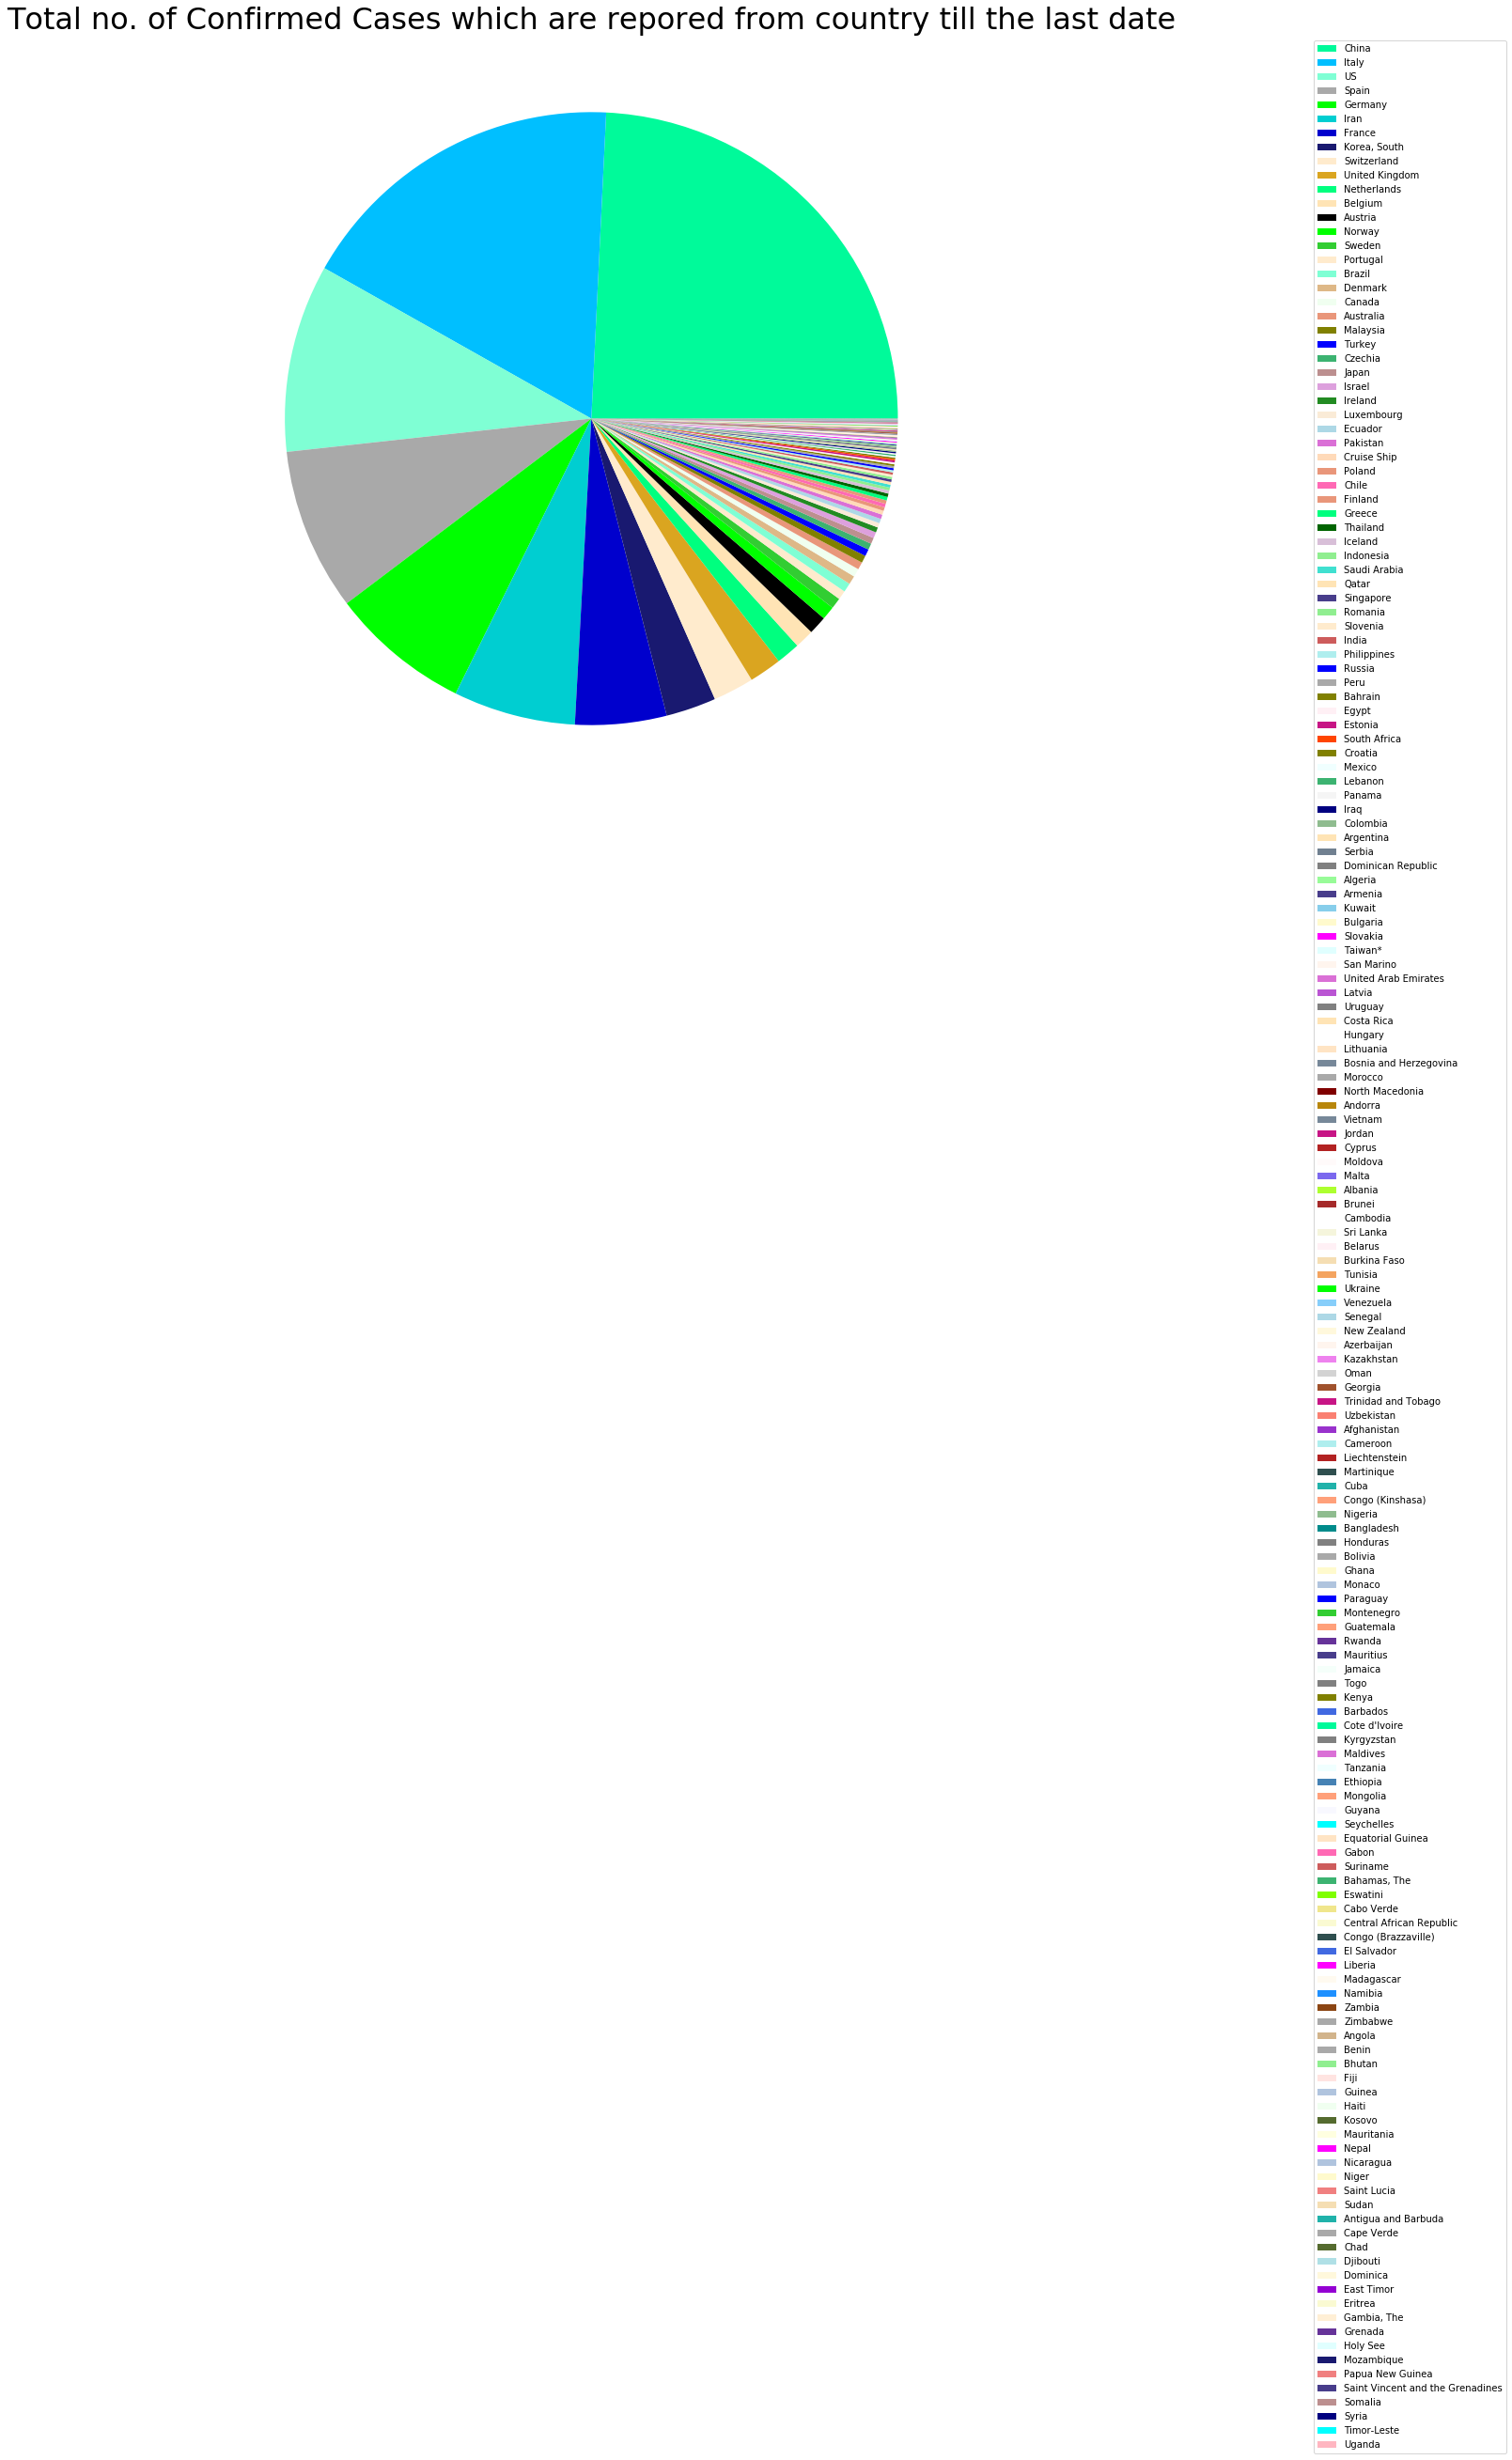

In [13]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(15,15))
plt.pie(confirmed_country_list, colors=c)
plt.legend(unique_countries, loc='best', bbox_to_anchor=(0.7, 0., 1, 1))
plt.title('Total no. of Confirmed Cases which are repored from country till the last date',size=32)
plt.show()

# Plotting the Data Datewise:


In [15]:
dates=df_Confirmed.keys()
dates=dates[4:]
dates=list(dates)

In [16]:
df_Confirmed.head()


,Province/State,Country/Region,Lat,Long,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,43,43,43,47,48,50,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,274,293,331,360,420,461,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,108,110,110,117,130,138,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,29,36,50,50,83,93,...,197,238,428,566,673,790,900,1030,1183,1306


In [17]:
cases_on_dates=[]
for i in dates:
  sum_of_cases=df_Confirmed[i].sum()
  cases_on_dates.append(sum_of_cases)
  print(f'{i}: {sum_of_cases}')

3/2/20: 90306
3/3/20: 92840
3/4/20: 95120
3/5/20: 97882
3/6/20: 101784
3/7/20: 105821
3/8/20: 109795
3/9/20: 113561
3/10/20: 118592
3/11/20: 125865
3/12/20: 128343
3/13/20: 145193
3/14/20: 156094
3/15/20: 167446
3/16/20: 181527
3/17/20: 197142
3/18/20: 214910
3/19/20: 242708
3/20/20: 272166
3/21/20: 304524
3/22/20: 335955


In [18]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))


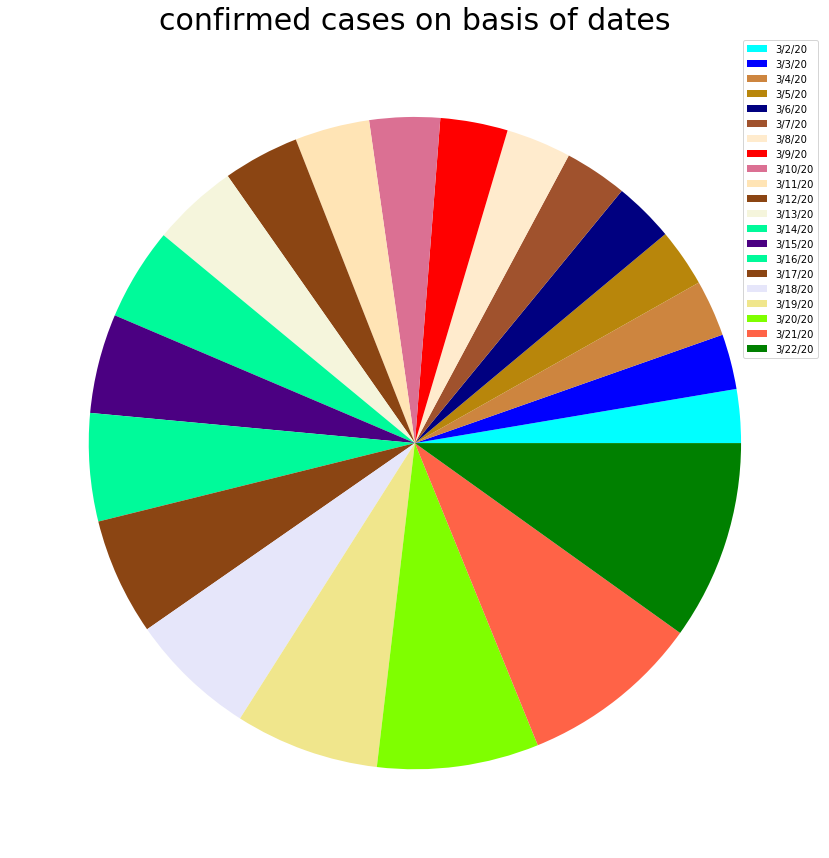

In [19]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(dates))
plt.figure(figsize=(15,15))
plt.pie(cases_on_dates,colors=c)
plt.title('confirmed cases on basis of dates',size=30)
plt.legend(dates, loc='best')
plt.show()


# Continent-wise Plotting


# Top 10 countries with most cases reported

In [20]:
for i in range(10):
    print(f'{unique_countries[i]}: {confirmed_country_list[i]} cases')

China: 81397 cases
Italy: 59138 cases
US: 33272 cases
Spain: 28768 cases
Germany: 24873 cases
Iran: 21638 cases
France: 16176 cases
Korea, South: 8897 cases
Switzerland: 7245 cases
United Kingdom: 5741 cases


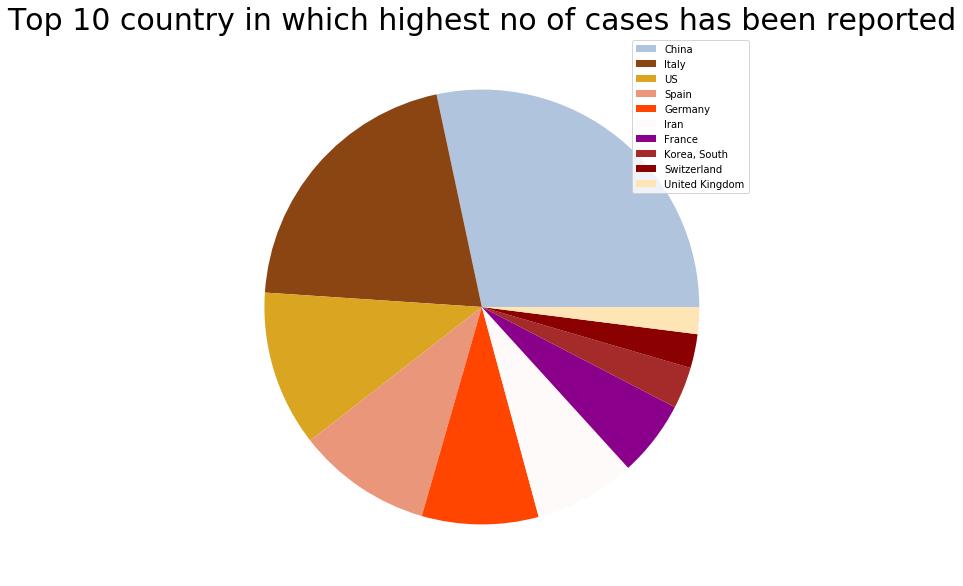

In [21]:
c=random.choices(list(mcolors.CSS4_COLORS.values()),k=len(dates))
plt.figure(figsize=(10,10))
plt.pie(confirmed_country_list[:10],colors=c)
plt.legend(unique_countries[:10],loc='best')
plt.title('Top 10 country in which highest no of cases has been reported',size=30)
plt.show()